In [37]:
## https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/

# import the necessary packages
import imutils
import cv2
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [48]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("images/hand4.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayGaussian = cv2.GaussianBlur(gray, (5, 5), 0)

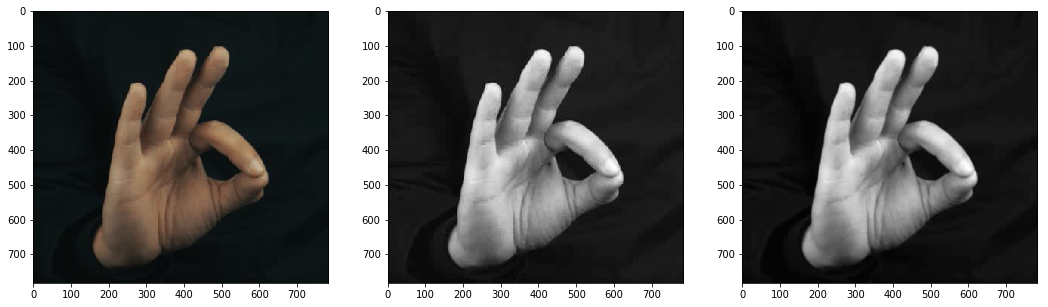

In [49]:
# plot different versions of the hand
f, axarr = matplotlib.pyplot.subplots(1,3, figsize = (18,5))
axarr[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), aspect='auto', interpolation='nearest')
axarr[1].imshow(gray, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[2].imshow(grayGaussian, cmap='Greys_r', aspect='auto', interpolation='nearest')

In [50]:
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(grayGaussian, 45, 255, cv2.THRESH_BINARY)[1]
threshErode = cv2.erode(thresh, None, iterations=2)
threshDilate = cv2.dilate(threshErode, None, iterations=2)

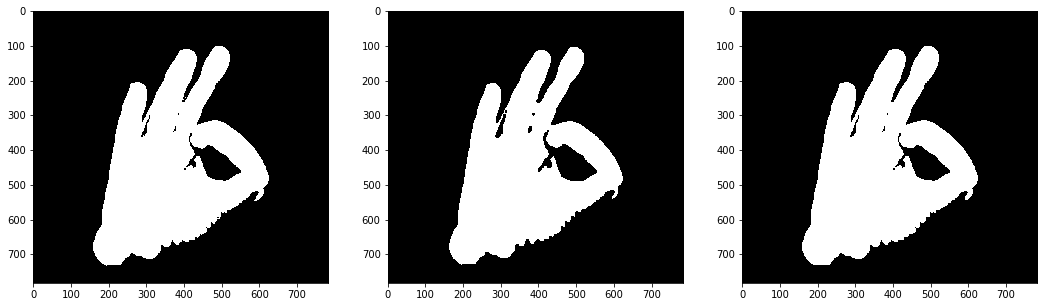

In [51]:
# plot different versions of the hand
f, axarr = matplotlib.pyplot.subplots(1,3, figsize = (18,5))
axarr[0].imshow(thresh, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[1].imshow(threshErode, cmap='Greys_r', aspect='auto', interpolation='nearest')
axarr[2].imshow(threshDilate, cmap='Greys_r', aspect='auto', interpolation='nearest')

In [52]:
# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(threshDilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
c = max(cnts, key=cv2.contourArea)

In [53]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [54]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)

array([[[15, 14,  9],
        [15, 14,  9],
        [15, 14,  9],
        ..., 
        [23, 21, 13],
        [23, 21, 13],
        [23, 21, 13]],

       [[15, 14,  9],
        [15, 14,  9],
        [15, 14,  9],
        ..., 
        [23, 21, 13],
        [23, 21, 13],
        [23, 21, 13]],

       [[15, 15,  9],
        [15, 15,  9],
        [15, 15,  9],
        ..., 
        [23, 21, 13],
        [23, 21, 13],
        [23, 21, 13]],

       ..., 
       [[13, 13,  9],
        [13, 13,  9],
        [13, 13,  9],
        ..., 
        [18, 18, 12],
        [18, 18, 12],
        [18, 18, 12]],

       [[13, 13,  9],
        [13, 13,  9],
        [13, 13,  9],
        ..., 
        [18, 18, 12],
        [18, 18, 12],
        [18, 18, 12]],

       [[13, 13,  9],
        [13, 13,  9],
        [13, 13,  9],
        ..., 
        [18, 18, 12],
        [18, 18, 12],
        [18, 18, 12]]], dtype=uint8)

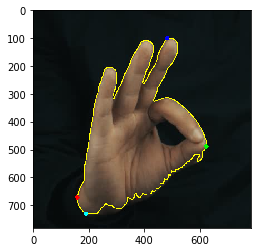

In [55]:
matplotlib.pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [64]:
len(c)

1197